In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.rcParams['figure.figsize'] = [6, 6]
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

profiles = pd.read_csv('profiles.csv')

In [2]:
profiles.head()

,age,body_type,diet,drinks,drugs,education,essay0,essay1,essay2,essay3,...,location,offspring,orientation,pets,religion,sex,sign,smokes,speaks,status
0,22,a little extra,strictly anything,socially,never,working on college/university,about me:<br />\n<br />\ni would love to think...,currently working as an international agent fo...,making people laugh.<br />\nranting about a go...,"the way i look. i am a six foot half asian, ha...",...,"south san francisco, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism and very serious about it,m,gemini,sometimes,english,single
1,35,average,mostly other,often,sometimes,working on space camp,i am a chef: this is what that means.<br />\n1...,dedicating everyday to being an unbelievable b...,being silly. having ridiculous amonts of fun w...,NaN,...,"oakland, california","doesn&rsquo;t have kids, but might want them",straight,likes dogs and likes cats,agnosticism but not too serious about it,m,cancer,no,"english (fluently), spanish (poorly), french (...",single
2,38,thin,anything,socially,NaN,graduated from masters program,"i'm not ashamed of much, but writing public te...","i make nerdy software for musicians, artists, ...",improvising in different contexts. alternating...,my large jaw and large glasses are the physica...,...,"san francisco, california",NaN,straight,has cats,NaN,m,pisces but it doesn&rsquo;t matter,no,"english, french, c++",available
3,23,thin,vegetarian,socially,NaN,working on college/university,i work in a library and go to school. . .,reading things written by old dead people,playing synthesizers and organizing books acco...,socially awkward but i do my best,...,"berkeley, california",doesn&rsquo;t want kids,straight,likes cats,NaN,m,pisces,no,"english, german (poorly)",single
4,29,athletic,NaN,socially,never,graduated from college/university,hey how's it going? currently vague on the pro...,work work work work + play,creating imagery to look at:<br />\nhttp://bag...,i smile a lot and my inquisitive nature,...,"san francisco, california",NaN,straight,likes dogs and likes cats,NaN,m,aquarius,no,english,single


In [3]:
print(len(profiles))

59946


In [4]:
profiles.last_online.head()

0    2012-06-28-20-30
1    2012-06-29-21-41
2    2012-06-27-09-10
3    2012-06-28-14-22
4    2012-06-27-21-26
Name: last_online, dtype: object

In [5]:
list(profiles.columns)

['age',
 'body_type',
 'diet',
 'drinks',
 'drugs',
 'education',
 'essay0',
 'essay1',
 'essay2',
 'essay3',
 'essay4',
 'essay5',
 'essay6',
 'essay7',
 'essay8',
 'essay9',
 'ethnicity',
 'height',
 'income',
 'job',
 'last_online',
 'location',
 'offspring',
 'orientation',
 'pets',
 'religion',
 'sex',
 'sign',
 'smokes',
 'speaks',
 'status']

In [6]:
print('# of categories:', profiles.sign.nunique())
print('# of categories:', profiles.sign.unique())

# of categories: 48
# of categories: ['gemini' 'cancer' 'pisces but it doesn&rsquo;t matter' 'pisces'
 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'gemini but it doesn&rsquo;t matter' 'cancer but it doesn&rsquo;t matter'
 'leo but it doesn&rsquo;t matter' nan
 'aquarius but it doesn&rsquo;t matter'
 'aries and it&rsquo;s fun to think about'
 'libra but it doesn&rsquo;t matter'
 'pisces and it&rsquo;s fun to think about' 'libra'
 'taurus but it doesn&rsquo;t matter'
 'sagittarius but it doesn&rsquo;t matter' 'scorpio and it matters a lot'
 'gemini and it&rsquo;s fun to think about'
 'leo and it&rsquo;s fun to think about'
 'cancer and it&rsquo;s fun to think about'
 'libra and it&rsquo;s fun to think about'
 'aquarius and it&rsquo;s fun to think about'
 'virgo but it doesn&rsquo;t matter'
 'scorpio and it&rsquo;s fun to think about'
 'capricorn but it doesn&rsquo;t matter' 'scorpio'
 'capricorn and it&rsquo;s fun to think about' 'leo'
 'aries but it doesn&rsquo;t matter' 'aries'
 'scorpi

In [7]:
# there are more than 12 signs becuase some has extra descriptions

In [8]:
profiles['SignsCleaned'] = profiles.sign.str.split().str.get(0)

In [9]:
print("# of categories:", profiles.SignsCleaned.nunique())
print("Categories:", profiles.SignsCleaned.unique())

profiles.SignsCleaned.value_counts()

# of categories: 12
Categories: ['gemini' 'cancer' 'pisces' 'aquarius' 'taurus' 'virgo' 'sagittarius'
 'leo' nan 'aries' 'libra' 'scorpio' 'capricorn']


leo            4374
gemini         4310
libra          4207
cancer         4206
virgo          4141
taurus         4140
scorpio        4134
aries          3989
pisces         3946
sagittarius    3942
aquarius       3928
capricorn      3573
Name: SignsCleaned, dtype: int64

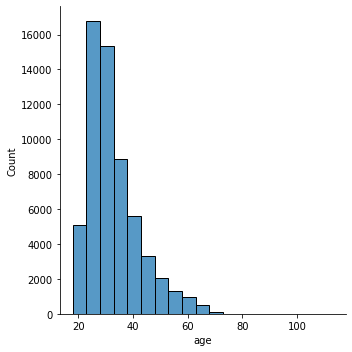

In [10]:
sns.displot(data=profiles, x="age", kind="hist", binwidth = 5)

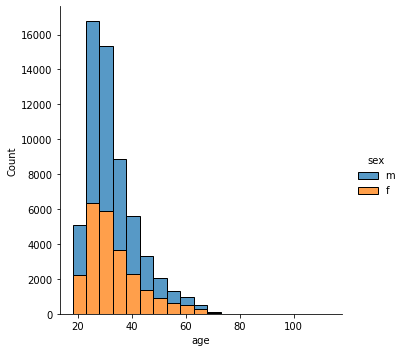

In [11]:
sns.displot(data=profiles, x="age", hue = "sex", kind="hist", binwidth = 5, multiple = "stack")

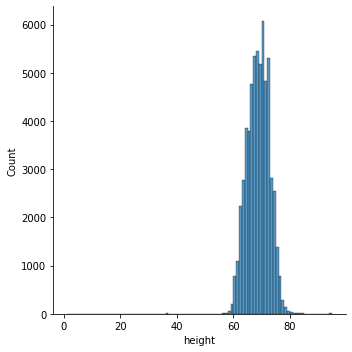

In [12]:
sns.displot(data=profiles, x="height", kind="hist", binwidth = 1)

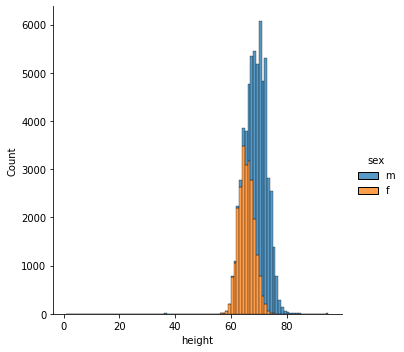

In [13]:
sns.displot(data=profiles, x="height", hue = "sex", kind="hist", binwidth = 1, multiple = "stack")

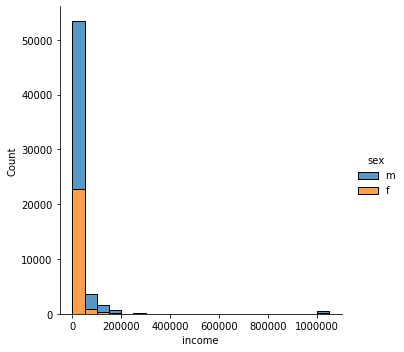

In [14]:
sns.displot(data=profiles, x="income", hue = "sex", kind="hist", binwidth = 50000, multiple = "stack")

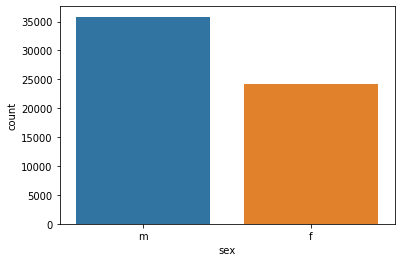

In [15]:
sns.countplot(data = profiles, x = "sex")

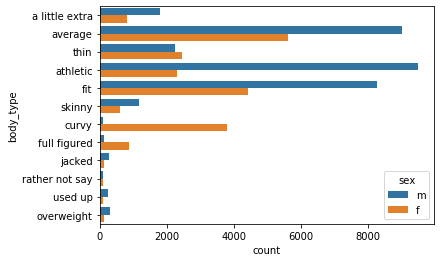

In [16]:
sns.countplot(data = profiles, y = "body_type", hue = "sex")

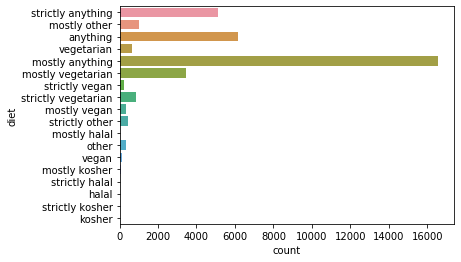

In [17]:
sns.countplot(data = profiles, y = "diet")

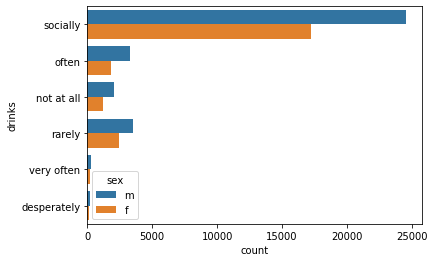

In [18]:
sns.countplot(data = profiles, y = 'drinks', hue = "sex")

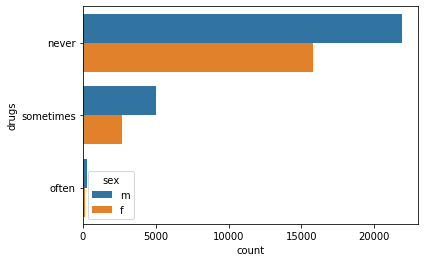

In [19]:
sns.countplot(data = profiles, y = 'drugs', hue = "sex")

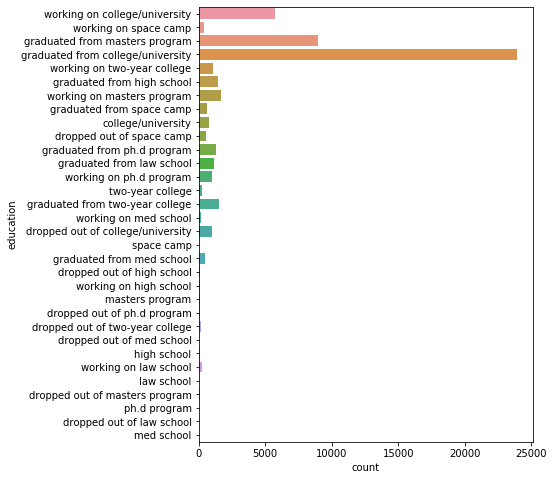

In [20]:
plt.figure(figsize = (6, 8))
sns.countplot(data = profiles, y = 'education')

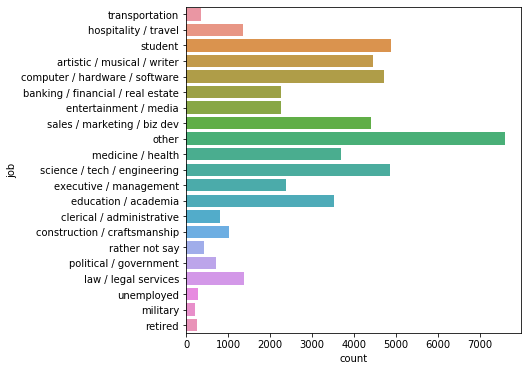

In [21]:
plt.figure(figsize = (6, 6))
sns.countplot(data = profiles, y = 'job')

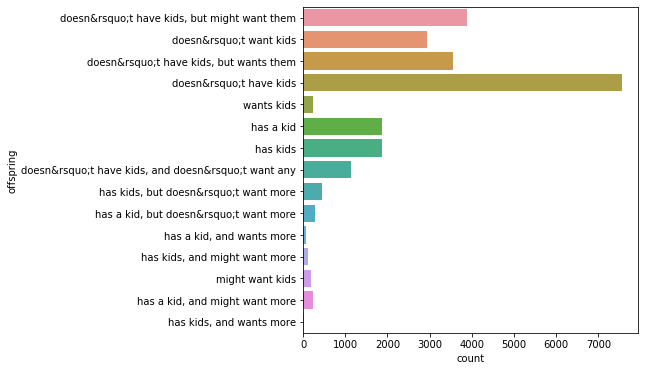

In [22]:
plt.figure(figsize = (6, 6))
sns.countplot(data = profiles, y = 'offspring')

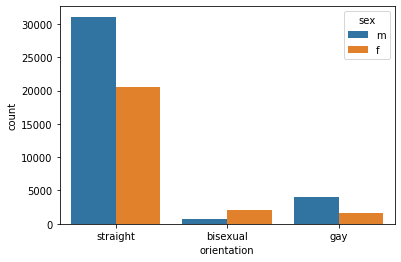

In [23]:
sns.countplot(data = profiles, x = 'orientation', hue = 'sex')

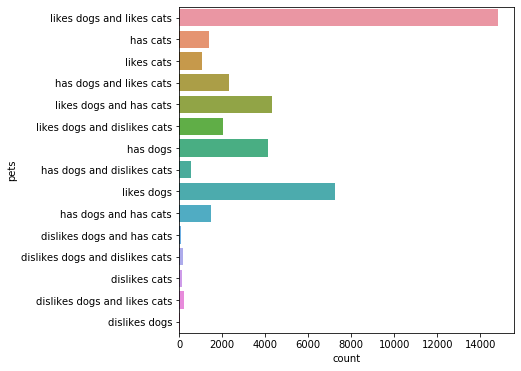

In [24]:
plt.figure(figsize = (6, 6))
sns.countplot(data = profiles, y = 'pets')

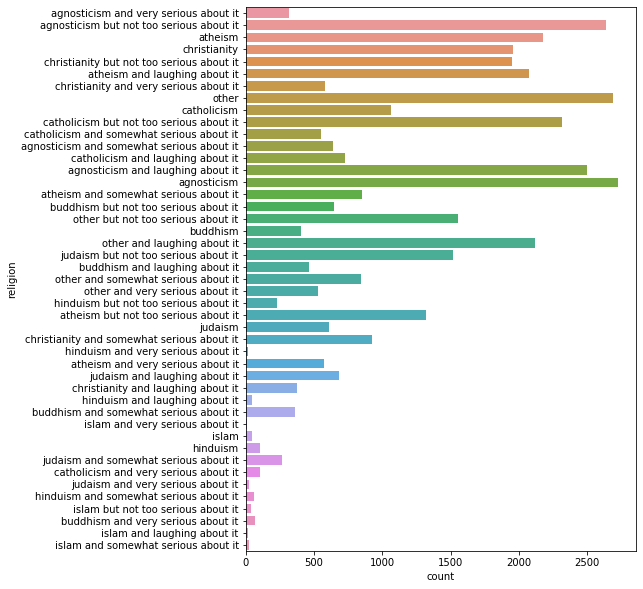

In [25]:
plt.figure(figsize = (7, 10))
sns.countplot(data = profiles, y = 'religion')

In [26]:
profiles['ReligionCleaned'] = profiles.religion.str.split().str.get(0)

# of Religions: 9


Text(0, 0.5, 'Religion')

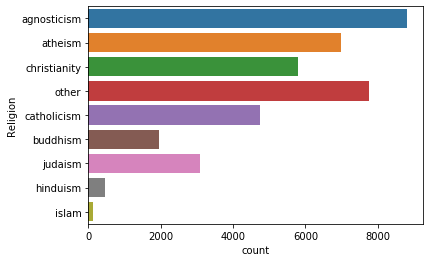

In [27]:
print("# of Religions:", profiles.ReligionCleaned.nunique())
sns.countplot(data = profiles, y = 'ReligionCleaned')
plt.ylabel('Religion')

Text(0, 0.5, 'Signs')

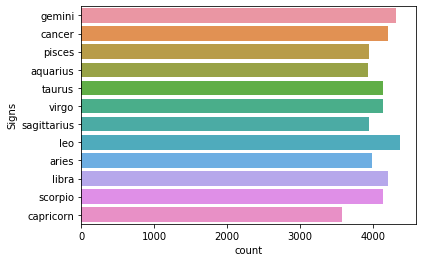

In [28]:
sns.countplot(data = profiles, y = "SignsCleaned")
plt.ylabel('Signs')

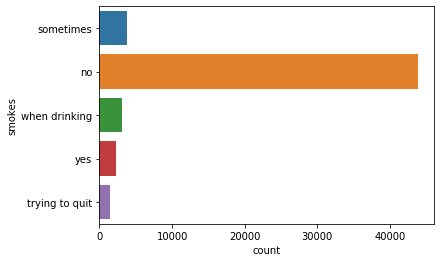

In [29]:
sns.countplot(data = profiles, y = 'smokes')

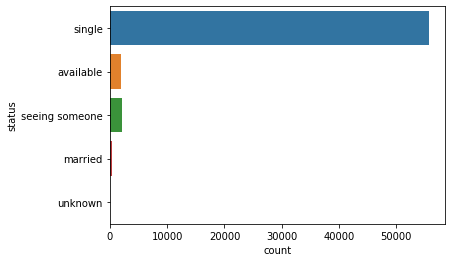

In [30]:
sns.countplot(data = profiles, y = 'status')

In [31]:
profiles.isnull().sum()

age                    0
body_type           5296
diet               24395
drinks              2985
drugs              14080
education           6628
essay0              5488
essay1              7572
essay2              9638
essay3             11476
essay4             10537
essay5             10850
essay6             13771
essay7             12451
essay8             19225
essay9             12603
ethnicity           5680
height                 3
income                 0
job                 8198
last_online            0
location               0
offspring          35561
orientation            0
pets               19921
religion           20226
sex                    0
sign               11056
smokes              5512
speaks                50
status                 0
SignsCleaned       11056
ReligionCleaned    20226
dtype: int64

In [32]:
cols = ['body_type', 'diet', 'orientation', 'pets', 'ReligionCleaned',
       'sex', 'job', 'SignsCleaned']
df = profiles[cols].dropna()
df.shape

(16453, 8)

In [33]:
for col in cols[:-1]:
    df = pd.get_dummies(df, columns = [col], prefix = [col])

In [34]:
df.head()

,SignsCleaned,body_type_a little extra,body_type_athletic,body_type_average,body_type_curvy,body_type_fit,body_type_full figured,body_type_jacked,body_type_overweight,body_type_rather not say,...,job_military,job_other,job_political / government,job_rather not say,job_retired,job_sales / marketing / biz dev,job_science / tech / engineering,job_student,job_transportation,job_unemployed
0,gemini,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,cancer,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,taurus,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,sagittarius,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,cancer,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [35]:
df.SignsCleaned.value_counts()

leo            1516
gemini         1496
cancer         1457
virgo          1451
taurus         1390
scorpio        1356
libra          1354
pisces         1334
aries          1328
sagittarius    1312
aquarius       1262
capricorn      1197
Name: SignsCleaned, dtype: int64

In [36]:
col_length = len(df.columns)

x = df.iloc[:, 1:col_length]
y = df.iloc[:, 0:1]

val_size = 0.25

from sklearn.model_selection import train_test_split
x_train, x_val, y_train, y_val = train_test_split(x, y, test_size = val_size, random_state = 0)

y_train = y_train.to_numpy().ravel()
y_val = y_val.to_numpy().ravel()

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

In [38]:
lr_model = LogisticRegression(multi_class = 'multinomial').fit(x_train, y_train)
lr_predictions = lr_model.predict(x_train)

In [39]:
from sklearn.metrics import classification_report
print(classification_report(y_train, lr_predictions))

              precision    recall  f1-score   support

    aquarius       0.13      0.07      0.09       968
       aries       0.12      0.10      0.11       983
      cancer       0.13      0.24      0.17      1129
   capricorn       0.14      0.05      0.07       882
      gemini       0.12      0.15      0.13      1130
         leo       0.12      0.19      0.15      1121
       libra       0.11      0.08      0.09      1028
      pisces       0.11      0.09      0.10       997
 sagittarius       0.13      0.09      0.11       965
     scorpio       0.14      0.05      0.08      1001
      taurus       0.13      0.12      0.12      1045
       virgo       0.12      0.21      0.15      1090

    accuracy                           0.12     12339
   macro avg       0.12      0.12      0.11     12339
weighted avg       0.12      0.12      0.12     12339



In [40]:
knn_model = KNeighborsClassifier(n_neighbors = 5).fit(x_train, y_train)
knn_predictions = knn_model.predict(x_train)

In [41]:
print(classification_report(y_train, knn_predictions))

              precision    recall  f1-score   support

    aquarius       0.25      0.65      0.36       968
       aries       0.25      0.51      0.34       983
      cancer       0.29      0.43      0.35      1129
   capricorn       0.33      0.34      0.33       882
      gemini       0.37      0.32      0.35      1130
         leo       0.39      0.28      0.32      1121
       libra       0.39      0.23      0.29      1028
      pisces       0.39      0.25      0.31       997
 sagittarius       0.45      0.18      0.26       965
     scorpio       0.42      0.20      0.28      1001
      taurus       0.43      0.25      0.31      1045
       virgo       0.42      0.27      0.33      1090

    accuracy                           0.33     12339
   macro avg       0.36      0.33      0.32     12339
weighted avg       0.37      0.33      0.32     12339



In [44]:
dt_model = DecisionTreeClassifier().fit(x_train, y_train)
dt_predictions = dt_model.predict(x_train)

In [45]:
print(classification_report(y_train, dt_predictions))

              precision    recall  f1-score   support

    aquarius       0.67      0.94      0.78       968
       aries       0.66      0.88      0.75       983
      cancer       0.71      0.86      0.77      1129
   capricorn       0.74      0.84      0.79       882
      gemini       0.78      0.79      0.79      1130
         leo       0.80      0.80      0.80      1121
       libra       0.79      0.76      0.78      1028
      pisces       0.82      0.74      0.78       997
 sagittarius       0.91      0.70      0.79       965
     scorpio       0.89      0.71      0.79      1001
      taurus       0.93      0.70      0.80      1045
       virgo       0.94      0.67      0.78      1090

    accuracy                           0.78     12339
   macro avg       0.80      0.78      0.78     12339
weighted avg       0.80      0.78      0.78     12339



In [51]:
from sklearn.metrics import confusion_matrix 
cart_cm = confusion_matrix(y_train, dt_predictions)
cart_labels = dt_model.classes_

[Text(0, 0.5, 'aquarius'),
 Text(0, 1.5, 'aries'),
 Text(0, 2.5, 'cancer'),
 Text(0, 3.5, 'capricorn'),
 Text(0, 4.5, 'gemini'),
 Text(0, 5.5, 'leo'),
 Text(0, 6.5, 'libra'),
 Text(0, 7.5, 'pisces'),
 Text(0, 8.5, 'sagittarius'),
 Text(0, 9.5, 'scorpio'),
 Text(0, 10.5, 'taurus'),
 Text(0, 11.5, 'virgo')]

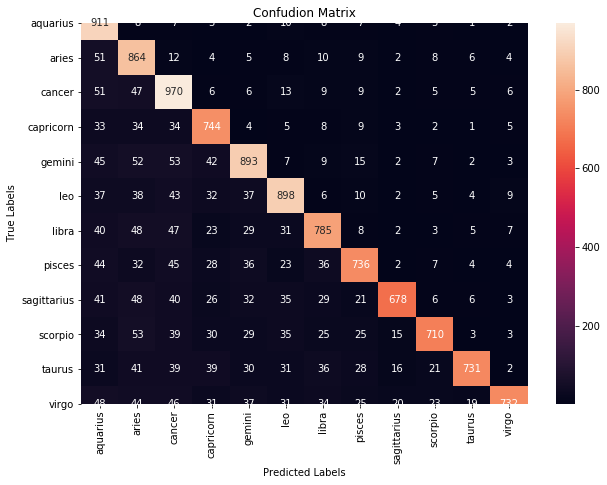

In [62]:
plt.figure(figsize = (10, 7))

ax = plt.subplot()
sns.heatmap(cart_cm, annot = True, ax = ax,fmt = "d")

ax.set_xlabel("Predicted Labels")
ax.set_ylabel("True Labels")
ax.set_title("Confudion Matrix")
ax.yaxis.set_tick_params(rotation = 360)
ax.xaxis.set_tick_params(rotation = 90)

ax.xaxis.set_ticklabels(cart_labels)
ax.yaxis.set_ticklabels(cart_labels)

In [69]:
dt_model.get_depth()

49

In [72]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kfold = KFold(n_splits = 5, shuffle = True, random_state = 0)
results = cross_val_score(dt_model, x_train, y_train, cv = kfold, scoring = "accuracy")

print(results)
print("Baseline: %.2f%% (%.2f%%)" % (results.mean() * 100, results.std() * 100))

[0.08265802 0.0952188  0.09278768 0.10048622 0.08917714]
Baseline: 9.21% (0.60%)


In [73]:
cart_model20 = DecisionTreeClassifier(max_depth = 20).fit(x_train, y_train)
cart_decisions20 = cart_model20.predict(x_train)

In [74]:
print(classification_report(y_train, cart_decisions20))

              precision    recall  f1-score   support

    aquarius       0.57      0.40      0.47       968
       aries       0.43      0.43      0.43       983
      cancer       0.37      0.50      0.42      1129
   capricorn       0.53      0.42      0.47       882
      gemini       0.40      0.44      0.42      1130
         leo       0.36      0.48      0.41      1121
       libra       0.29      0.42      0.34      1028
      pisces       0.66      0.34      0.45       997
 sagittarius       0.65      0.33      0.44       965
     scorpio       0.36      0.40      0.37      1001
      taurus       0.53      0.39      0.45      1045
       virgo       0.32      0.40      0.36      1090

    accuracy                           0.41     12339
   macro avg       0.46      0.41      0.42     12339
weighted avg       0.45      0.41      0.42     12339



In [76]:
results20 = cross_val_score(cart_model20, x_train, y_train, cv = kfold, scoring = 'accuracy')

print(results20)
print("Baseline: %.2f%% (%.2f%%)" % (results20.mean() * 100, results20.std() * 100))

[0.07820097 0.08508914 0.08549433 0.08184765 0.09120389]
Baseline: 8.44% (0.43%)


In [79]:
knn_predictionsVal = knn_model.predict(x_val)
print(classification_report(y_val, knn_predictionsVal))

              precision    recall  f1-score   support

    aquarius       0.08      0.22      0.12       294
       aries       0.09      0.18      0.12       345
      cancer       0.09      0.15      0.11       328
   capricorn       0.06      0.06      0.06       315
      gemini       0.08      0.06      0.07       366
         leo       0.10      0.07      0.08       395
       libra       0.10      0.06      0.08       326
      pisces       0.07      0.05      0.06       337
 sagittarius       0.08      0.03      0.05       347
     scorpio       0.08      0.04      0.05       355
      taurus       0.07      0.04      0.05       345
       virgo       0.08      0.05      0.06       361

    accuracy                           0.08      4114
   macro avg       0.08      0.08      0.08      4114
weighted avg       0.08      0.08      0.07      4114



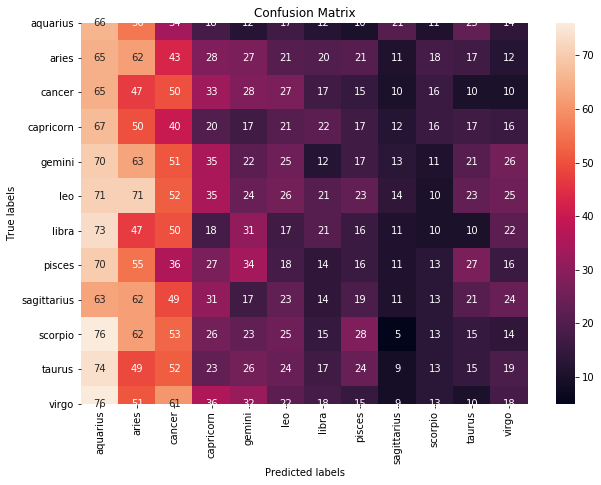

In [82]:
final_cm = confusion_matrix(y_val, knn_predictionsVal)
knn_labels = knn_model.classes_

plt.figure(figsize = (10, 7))

ax = plt.subplot()
sns.heatmap(final_cm, annot = True, ax = ax, fmt = "d")

ax.set_xlabel('Predicted labels');
ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix');
ax.yaxis.set_tick_params(rotation=360)
ax.xaxis.set_tick_params(rotation=90)

ax.xaxis.set_ticklabels(knn_labels); 
ax.yaxis.set_ticklabels(knn_labels);